In [1]:
import PhyPraKit as ppk
import numpy as np
import matplotlib.pyplot as plt

# Teilaufgabe a

Die Messungen der Beschleunidung wurden mithilfe der App Phyphox aufgezeichnet und werden nun eingelesen. Um die Periodendauer zu berechnen, eignet sich - nach genauem hinsehen - am besten die y-Achse.
Es wird nun die Autokorrelation berechnet und daraus die Minima und die Maxima.

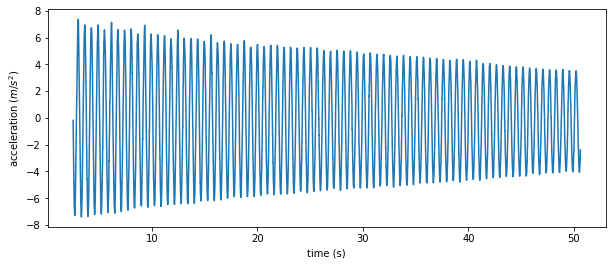

In [2]:
data = ppk.readCSV('HandyPendel.csv')[1]
t = data[0]
a = data[2]

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot()
ax1.plot(t, a)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('acceleration ($m/s^2$)')
plt.show()

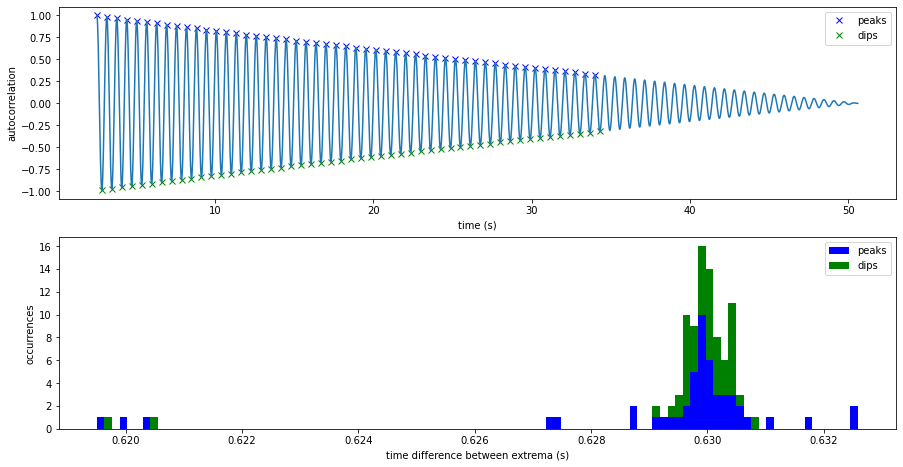

In [3]:
acceleration_autocorrelate = ppk.autocorrelate(a)
peaks = ppk.convolutionPeakfinder(acceleration_autocorrelate, 10, 0.66)
dips = ppk.convolutionPeakfinder(-acceleration_autocorrelate, 10, 0.66)
peaks[0] = 0
peak_times = t[peaks]
dip_times = t[dips]
peak_periods = [x - y for x, y in zip(peak_times[1:], peak_times)]
dip_periods = [x - y for x, y in zip(dip_times[1:], dip_times)]

fig = plt.figure(figsize=(15, 12))

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(peak_times, acceleration_autocorrelate[peaks], 'bx', label='peaks')
ax1.plot(dip_times, acceleration_autocorrelate[dips], 'gx', label='dips')
ax1.plot(t, acceleration_autocorrelate)
ax1.set_xlabel('time (s)')
ax1.set_ylabel('autocorrelation')
ax1.legend()

ax2 = fig.add_subplot(3, 1, 2)
ax2.hist([peak_periods, dip_periods], bins = 100, stacked = True, color=['b','g'], label=['peaks','dips'])
ax2.set_xlabel('time difference between extrema (s)')
ax2.set_ylabel('occurrences')
ax2.legend()

plt.show()

## Periode

Mithilfe der Extrema kann nun die Periodendauer berechnet werden. Eine Periode ist der zeitliche Abstand zwischen zwei Minima bzw. Maxima

In [4]:
peak_period_expected_value = np.mean(peak_periods)
peak_period_std = np.std(peak_periods)
peak_period_sem = peak_period_std / np.sqrt(len(peak_periods))
print('period (from peaks):\n\texpected value=' + str(peak_period_expected_value) + '\t\tstd=' + str(peak_period_std) + '\t\tsem=' + str(peak_period_sem))

dip_period_expected_value = np.mean(dip_periods)
dip_period_std = np.std(dip_periods)
dip_period_sem = dip_period_std / np.sqrt(len(dip_periods))
print('period (from dips):\n\texpected value=' + str(dip_period_expected_value) + '\t\tstd=' + str(dip_period_std) + '\t\tsem=' + str(dip_period_sem))

period (from peaks):
	expected value=0.62938633928		std=0.002538247133460606		sem=0.000358962352079462
period (from dips):
	expected value=0.62960675072		std=0.0019737814731467258		sem=0.00027913485284848465


Die Standwardabweichung der Periode, die mithilfe der Minima berechnet wurde, ist (wie man auch in der Häufigkeitsverteilung erkennen kann) niedriger als die der Periode, die mithilfe der Maxima berechnet wurde. Deshalb wird im Folgenden die Periode der Minima verwendet, also eine Periodendauer $T = 0.6296 \pm 0.0003 s$.

## Frequenz

Für die Frequenz gilt:
$$
ν = \frac{1}{T}
\\
\sigma_ν = \sqrt{(\frac{\partial{ν}}{\partial{T}} \cdot \sigma_T)^2} = \sqrt{(- \frac{1}{T^2} \cdot \sigma_T)^2}
$$

In [5]:
frequency_expected_value = 1/dip_period_expected_value
frequency_std = np.sqrt((-dip_period_std/(dip_period_expected_value**2))**2)
frequency_sem = frequency_std / np.sqrt(len(dip_periods))
print('frequency ν:\n\texpected value=' + str(frequency_expected_value) + '\tstd=' + str(frequency_std) + '\t\tsem=' + str(frequency_sem))

frequency ν:
	expected value=1.5882930080664304	std=0.004979208545119589		sem=0.0007041664254392129


Also gilt für die Frequenz $ν = 1.5883 \pm 0.0007 Hz$.

## Effektive Masse
Für die effektive Masse gilt:
$$
m_{\textrm{eff}} = M + \frac{1}{3}M_F
\\
\sigma_{m_{\textrm{eff}}} = \sqrt{\sigma_M^2 + (\frac{1}{3} \sigma_{M_F})^2}
$$

In [6]:
m_eff_expected_value = 141.74 * 10**-3 + (15.40 * 10**-3 / 3)
m_eff_std = np.sqrt(0.0001**2 + 0.0001**2 / 9)
print('effective mass m_eff:\n\texpected value=' + str(m_eff_expected_value) + '\tstd=' + str(m_eff_std))

effective mass m_eff:
	expected value=0.14687333333333333	std=0.00010540925533894598


Also gilt für die effektive Mass $m_{\textrm{eff}} = 0.1469 \pm 0.0001 kg$.

## Federkonstante
Für die Federkonstante gilt:
$$
D = \omega^2 \cdot m_{\textrm{eff}} = 4 \pi^2 \cdot ν^2 \cdot m_{\textrm{eff}}
\\
\sigma_D = \sqrt{(\frac{\partial{D}}{\partial{ν}} \cdot \sigma_ν)^2 + (\frac{\partial{D}}{\partial{m_{\textrm{eff}}}} \cdot \sigma_{m_{\textrm{eff}}})^2} = 4 \pi^2 \sqrt{(2 ν \cdot m_{\textrm{eff}} \cdot \sigma_ν)^2 + (ν^2 \cdot \sigma_{m_{\textrm{eff}}})^2}
$$

In [7]:
spring_constant_expected_value = (2 * np.pi * frequency_expected_value)**2 * m_eff_expected_value
spring_constant_std = 4 * np.pi**2 * np.sqrt((2 * frequency_expected_value * m_eff_expected_value * frequency_std)**2 + frequency_expected_value**4 * m_eff_std**2) 
spring_constant_sem = spring_constant_std / len(dip_periods)
print('spring constant D:\n\texpected value=' + str(spring_constant_expected_value) + '\tstd=' + str(spring_constant_std) + '\t\tsem=' + str(spring_constant_sem))

spring constant D:
	expected value=14.627292172095526	std=0.09231033032062136		sem=0.0018462066064124272


Also gilt für die Federkonstante $D = 14.627 \pm 0.002 \frac{N}{m}$.

# Teilaufgabe b

Mithilfe der Federkonstante aus Teilaufgabe a und einigen Messungen (`Messtabelle.txt`) soll nun die Erdbeschleunigung g bestimmt werden.

Die Daten werden eingelesen und mithilfe von `PhyPraKit.k2Fit` wird g bestimmt. 
Für die Auslenkung gilt:

$$
s = \frac{m}{D} \cdot g
$$

Die Messungen haben folgende Unsicherheiten:
- Unsicherheit der Massenmessung:  0.1 g
- Unsicherheit der Wegmessung:     0.2 cm

Für die Unsicherheit von g können die Unsicherheiten von D und $m_i$ vernachlässigt werden, da sie klein im Verhältnis zur Unsicherheit von s sind.

Welcome to JupyROOT 6.22/02


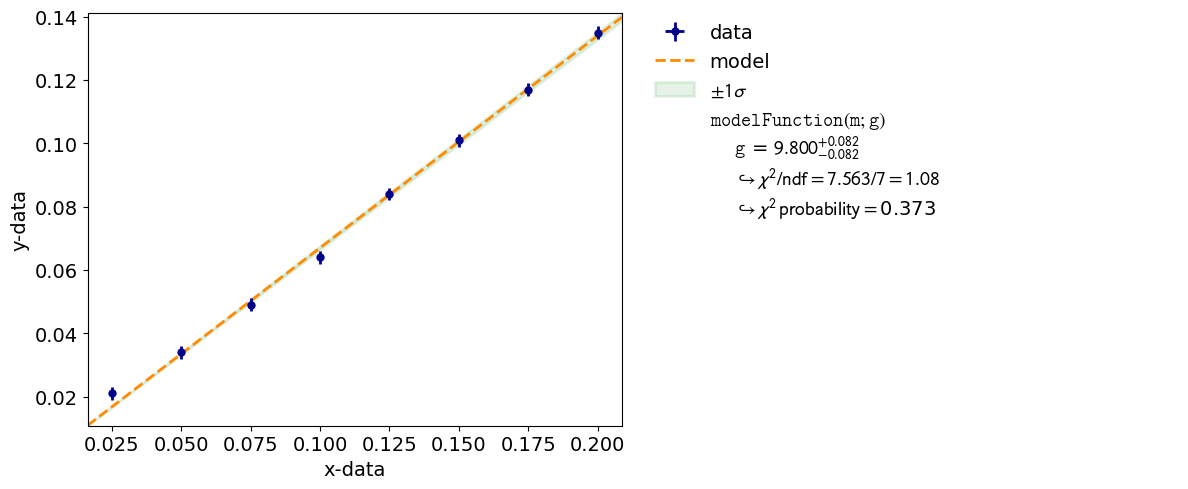

(array([9.80028576]), array([0.08192922]), array([[1.]]), 7.562500000000003)

In [8]:
data2 = np.genfromtxt('Messtabelle.txt').T
data2[0] = data2[0] * 10**-3
data2[1] = data2[1] *  10**-2

def modelFunction(m, g=1.0):
    return m/spring_constant_expected_value * g

ppk.k2Fit(modelFunction, data2[0], data2[1], sy=0.002)

Aus dem Fit ergibt sich nun $g = 9.800 \pm 0.082 \frac{m}{s^2}$.

### Freiwillig
Nun wird der auch Fehler für D und $m_i$ in `PhyPraKit.k2Fit` berücksichtigen:

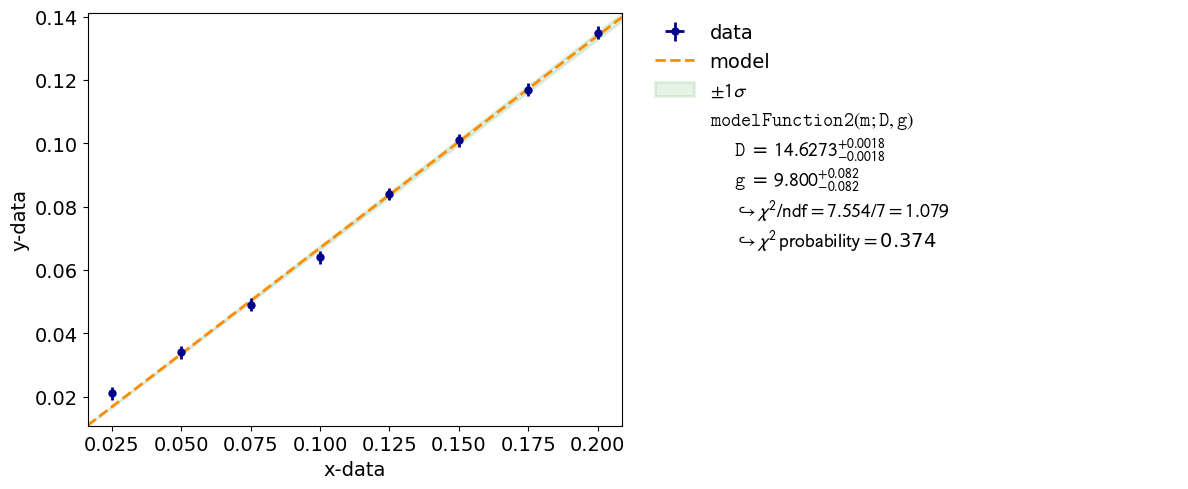

(array([14.62729217,  9.80028327]),
 array([0.00184621, 0.08198451]),
 array([[1.        , 0.01508766],
        [0.01508766, 1.        ]]),
 7.554022503476132)

return Minos error -2.11487e-07  , 2.13942e-07
return Minos error -3.75994e-05  , 3.73338e-05


In [9]:
def modelFunction2(m, D, g=1.0):
    return m/D * g

ppk.k2Fit(modelFunction2, data2[0], data2[1], sx=0.0001, sy=0.002, constraints=('D', spring_constant_expected_value, spring_constant_sem))

Auch hier ist $g = 9.800 \pm 0.082 \frac{m}{s^2}$.